In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pyteomics.mgf
from tqdm import tqdm

In [2]:
DATA_DIR = '../data/'

# Intensity weighting

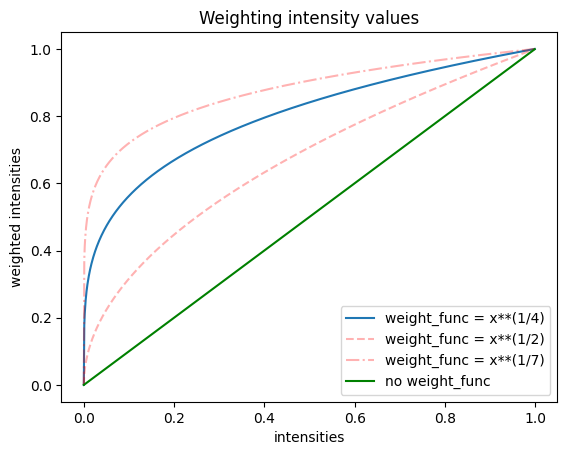

In [3]:
# Create figure showing intensity weighting functions
x = np.arange(0,1,0.001)
y = x**(1/4)
y2 = x**(1/2)
y3 = x**(1/7)
plt.plot(x,y, label='weight_func = x**(1/4)')
plt.plot(x,y2, label='weight_func = x**(1/2)', c='r', linestyle='--', alpha=0.3)
plt.plot(x,y3, label='weight_func = x**(1/7)', c='r', linestyle='-.', alpha=0.3)
plt.plot(x,x, label='no weight_func', c='g')
plt.legend()
plt.xlabel('intensities')
plt.ylabel('weighted intensities')
plt.title('Weighting intensity values')
plt.savefig('../../figures/weighting_intensity_function.png')
plt.show()

Look at how this weighting changes one of the spectra

In [4]:
# Read all spectra from the MGF.
spectra = []

# Download from https://zenodo.org/record/6829249/files/ALL_GNPS_NO_PROPOGATED.mgf?download=1
filename = ("../../data/ALL_GNPS_NO_PROPOGATED.mgf")

# Get wout spectra
with pyteomics.mgf.MGF(filename) as f_in:
    for spectrum_dict in tqdm(f_in):
        spectra.append(spectrum_dict)

0it [00:00, ?it/s]

495600it [01:04, 7688.92it/s] 


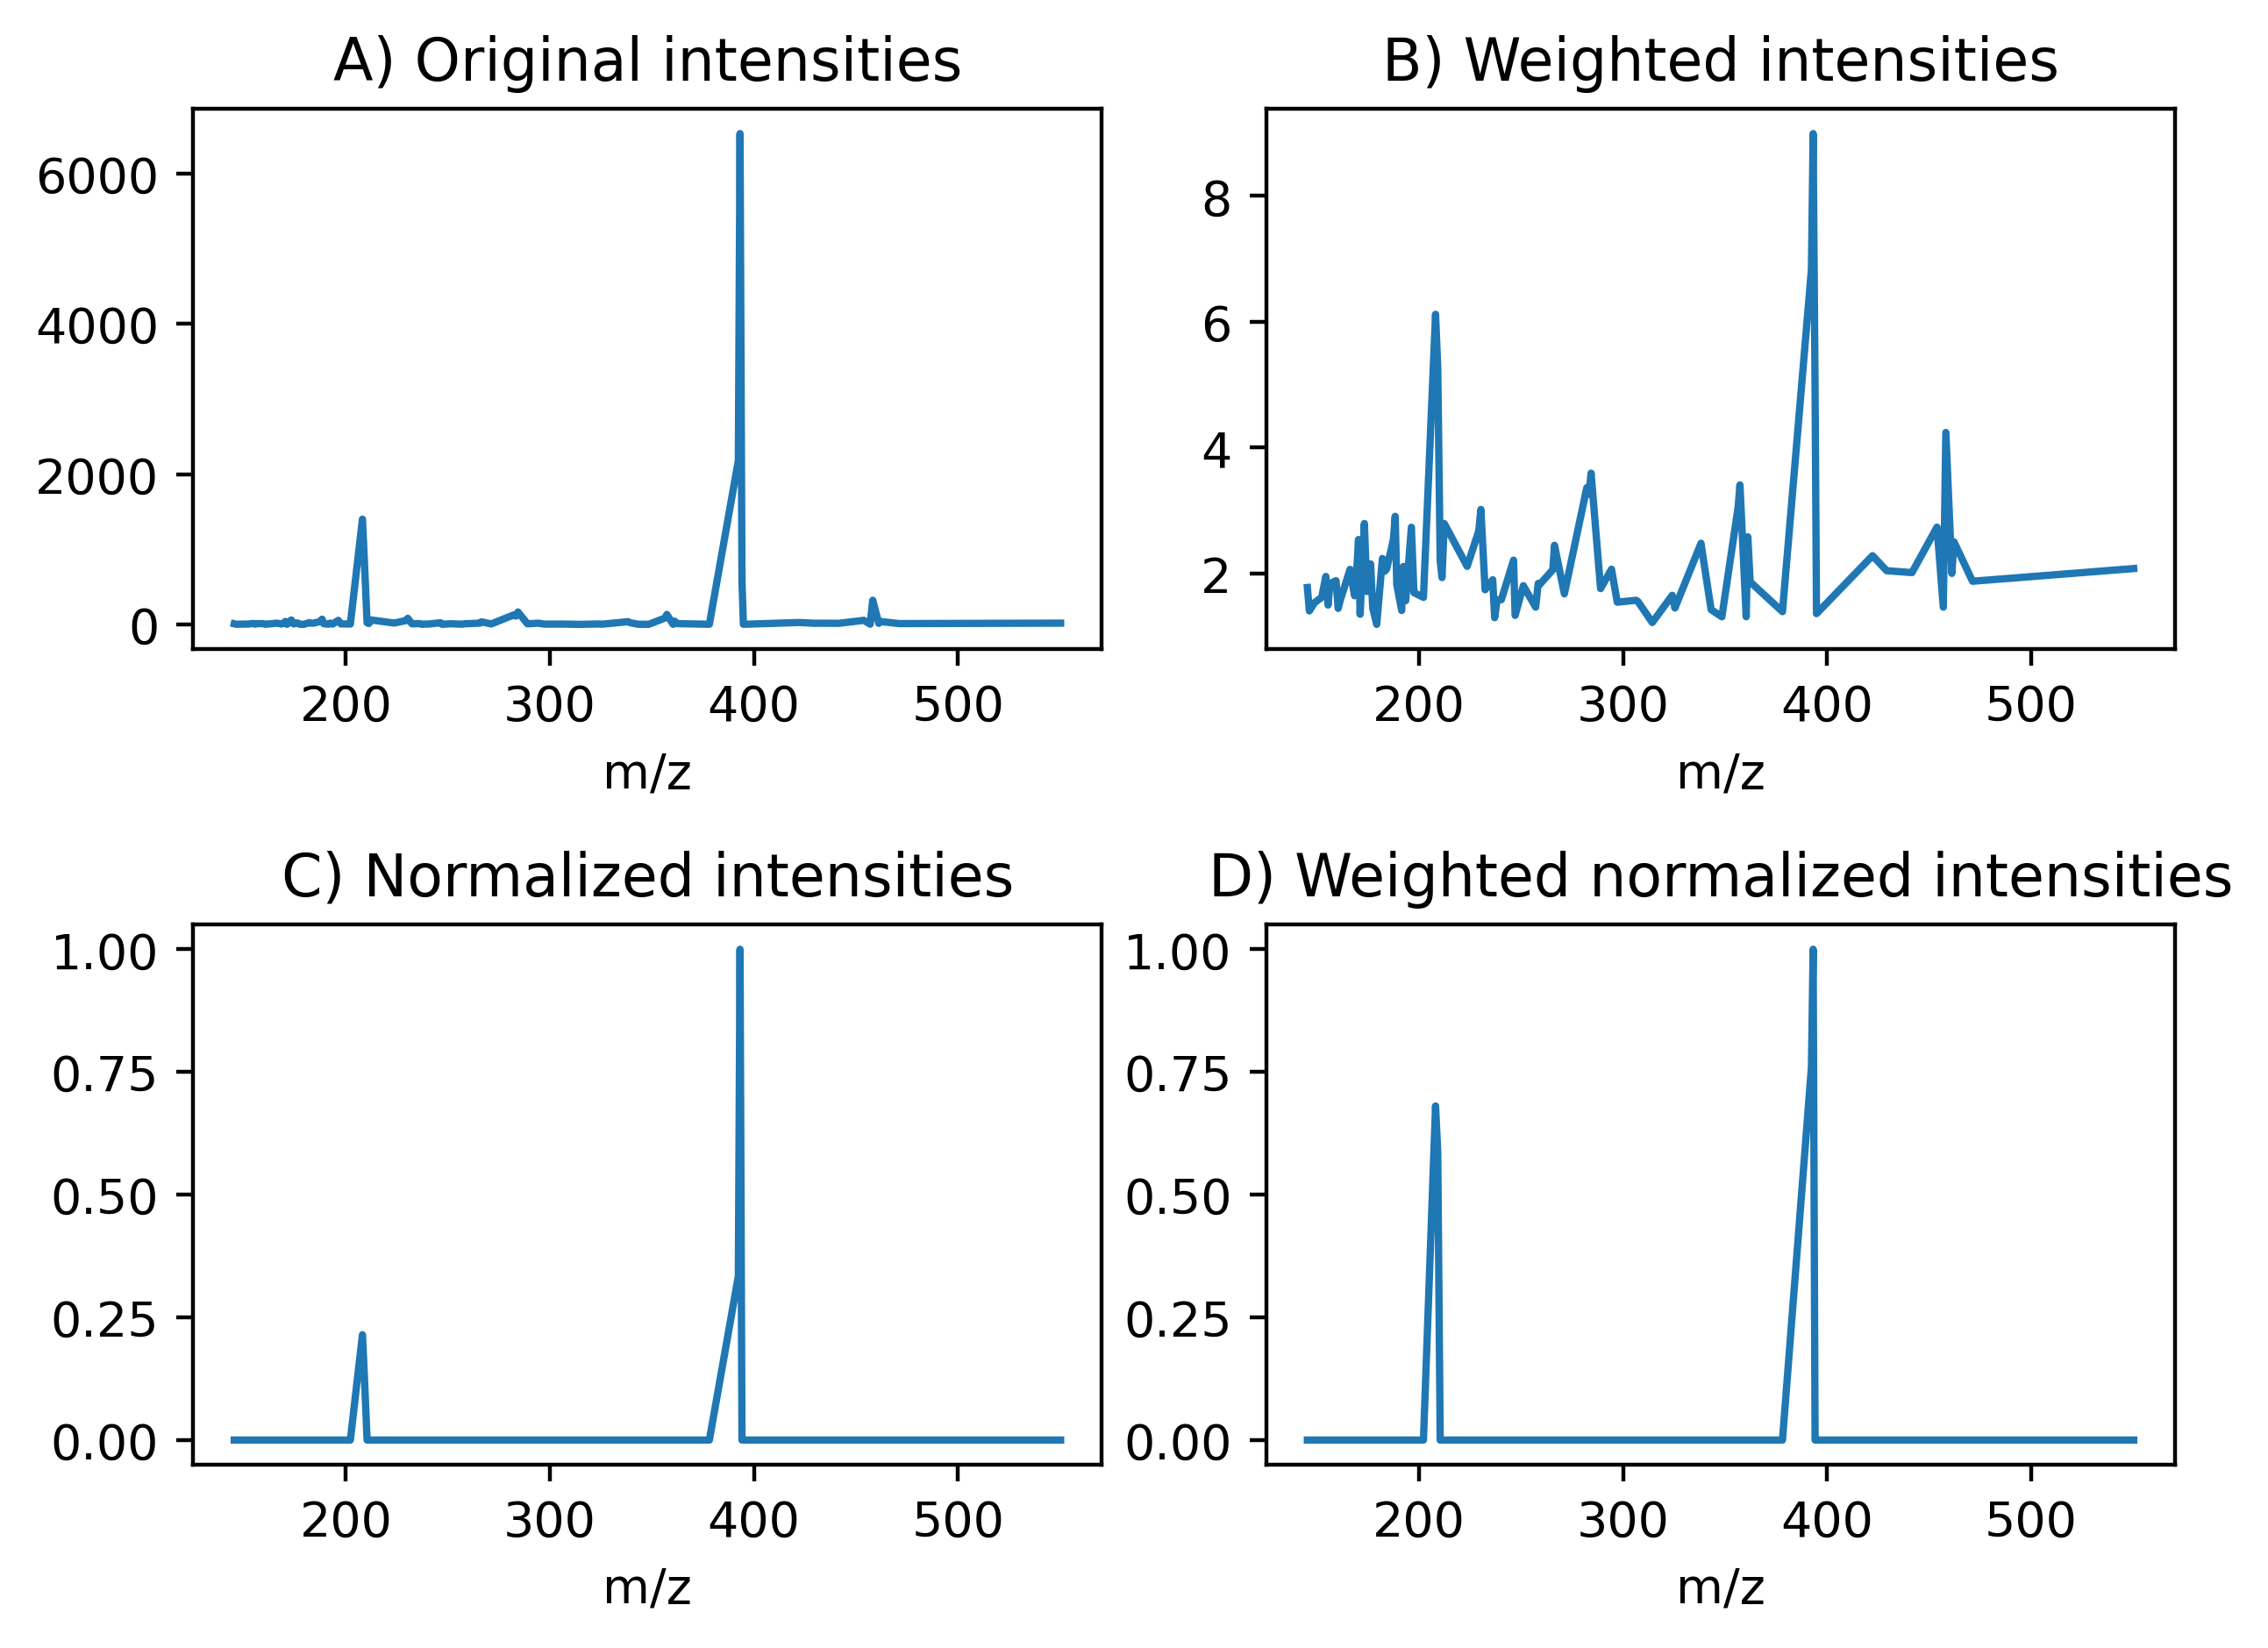

In [26]:
# Weight intensities for one spectra
#15, 100
index1 = 200
intensities1 = spectra[index1]['intensity array']
intensities1 = np.array([x if x > 0.1 else 0 for x in intensities1])
weighted_intensities1 = np.array(intensities1)**(1/4)

index2 = 20
intensities2 = spectra[index2]['intensity array']
intensities2 = np.array([x if x > 0.1 else 0 for x in intensities2])
weighted_intensities2 = np.array(intensities2)**(1/4)

# Plot original spectra
plt.figure(dpi=400)
plt.subplot(2,2,1)
#plt.plot(spectra[index1]['m/z array'], intensities1)
plt.plot(spectra[index2]['m/z array'], intensities2)
plt.xlabel('m/z')
plt.title('A) Original intensities')

# Plot weighted spectra
plt.subplot(2,2,2)
#plt.plot(spectra[index1]['m/z array'], weighted_intensities1)
plt.plot(spectra[index2]['m/z array'], weighted_intensities2)
plt.title('B) Weighted intensities')
plt.xlabel('m/z')
#plt.savefig('../figures/weighted_intensities.png', dpi=300)

# Weight intensities for one spectra
index1 = 200
intensities1 = spectra[index1]['intensity array']/max(spectra[index1]['intensity array'])
intensities1 = np.array([x if x > 0.1 else 0 for x in intensities1])
weighted_intensities1 = np.array(intensities1)**(1/4)

index2 = 20
intensities2 = spectra[index2]['intensity array']/max(spectra[index2]['intensity array'])
intensities2 = np.array([x if x > 0.1 else 0 for x in intensities2])
weighted_intensities2 = np.array(intensities2)**(1/4)

# Plot original spectra
plt.subplot(2,2,3)
#plt.plot(spectra[index1]['m/z array'], intensities1)
plt.plot(spectra[index2]['m/z array'], intensities2)
plt.title('C) Normalized intensities')
plt.xlabel('m/z')

# Plot weighted spectra
plt.subplot(2,2,4)
#plt.plot(spectra[index1]['m/z array'], weighted_intensities1)
plt.plot(spectra[index2]['m/z array'], weighted_intensities2)
plt.title('D) Weighted normalized intensities')
plt.xlabel('m/z')
#plt.savefig('../figures/weighted_intensities.png', dpi=300)
plt.tight_layout()
plt.show()

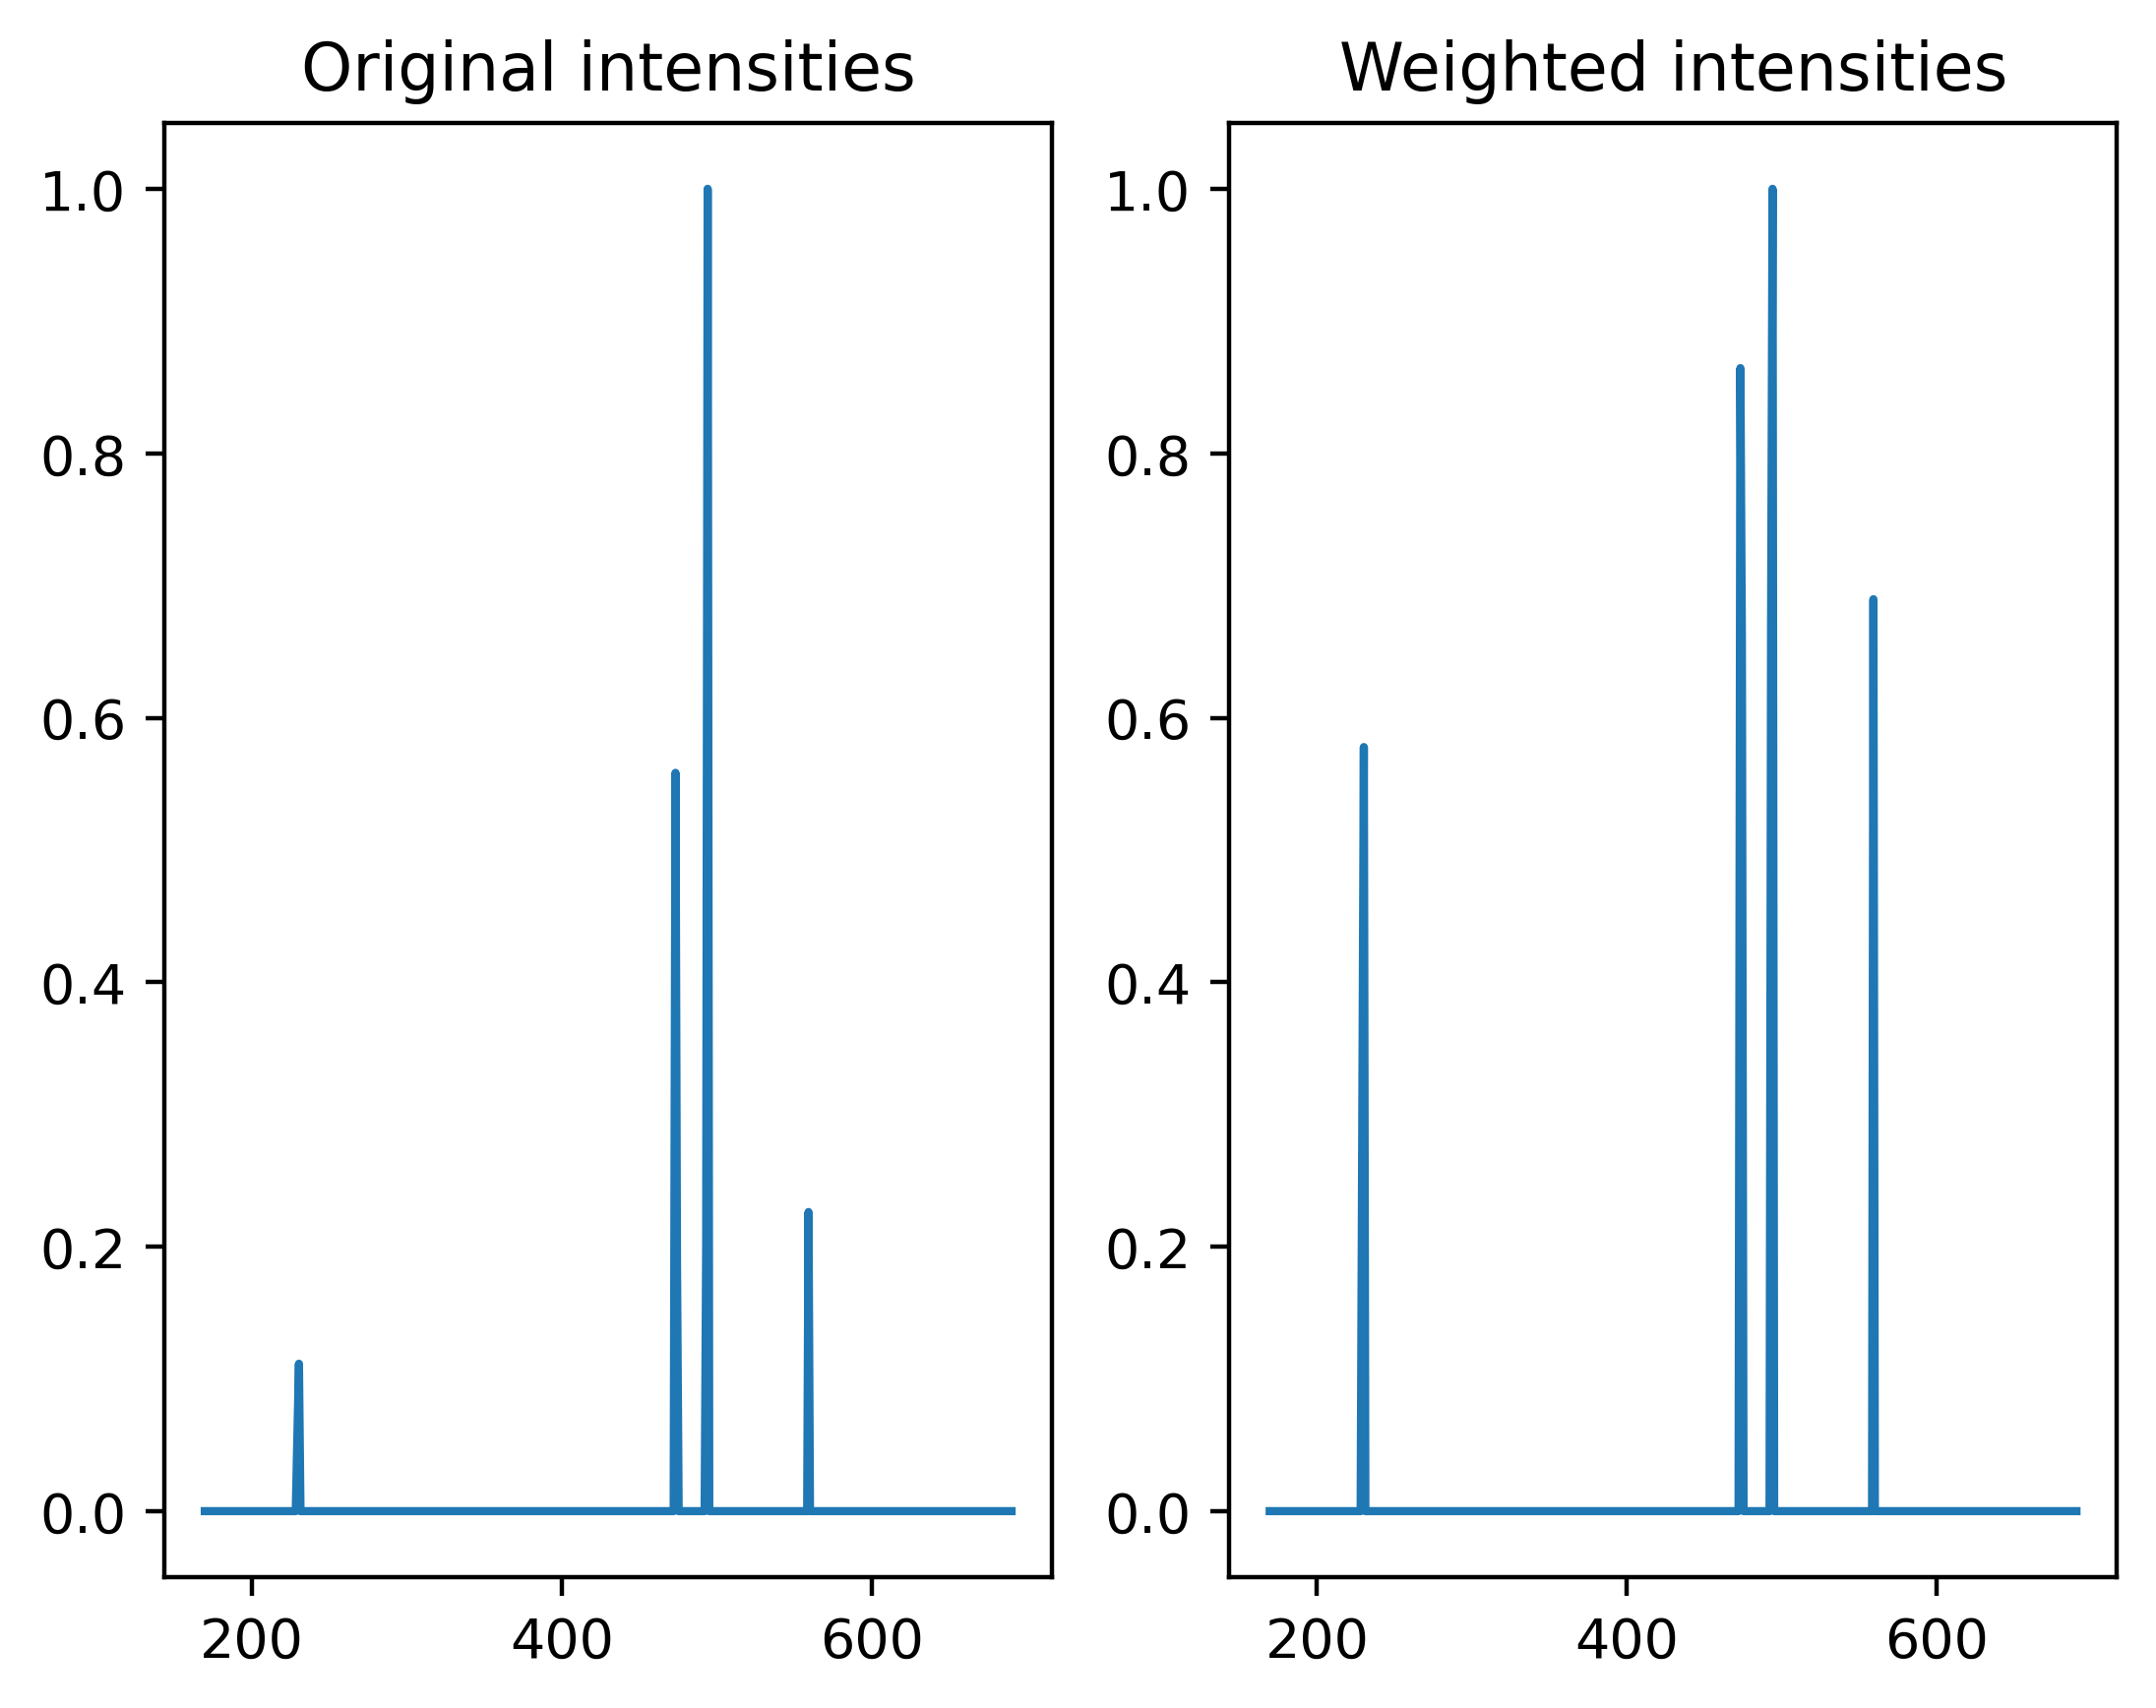

In [21]:
# Weight intensities for one spectra
index1 = 15
intensities1 = spectra[index1]['intensity array']/max(spectra[index1]['intensity array'])
intensities1 = np.array([x if x > 0.1 else 0 for x in intensities1])
weighted_intensities1 = np.array(intensities1)**(1/4)

# Plot original spectra
plt.figure(dpi=400)
plt.subplot(1,2,1)
plt.plot(spectra[index1]['m/z array'], intensities1)
plt.title('Original intensities')

# Plot weighted spectra
plt.subplot(1,2,2)
plt.plot(spectra[index1]['m/z array'], weighted_intensities1)
plt.title('Weighted intensities')
#plt.savefig('../figures/weighted_intensities.png', dpi=300)
plt.show()

# m/z weighting

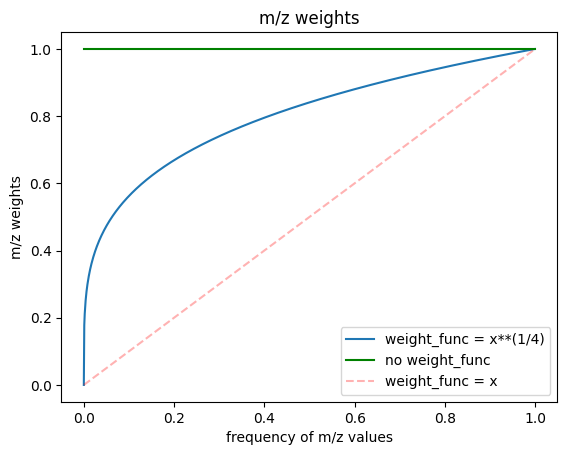

In [16]:
# Plot m/z weighting functions
x = np.arange(0,1,0.001)
y = x**(1/4)
plt.plot(x,y, label='weight_func = x**(1/4)')
plt.plot(x,np.ones(len(x)), label='no weight_func', c='g')
plt.plot(x,x, label='weight_func = x', c='r', linestyle='--', alpha=0.3)
plt.legend()
plt.xlabel('Frequency of m/z values')
plt.ylabel('m/z weights')
plt.title('m/z weights')
plt.savefig('../figures/weighting_mz_function.png')
plt.show()